In [82]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from scipy import misc
from filesSelector import *
from skimage import io
from scipy.misc import imresize
from scipy import signal
import exifread
import os
import json


In [90]:
def get_circ_centers(file_path,col=0,layer=0):
    # assuming i get 4 points for dna spot (rects)
    p = np.zeros((2))
    points=np.zeros((0,2))
    with open(file_path,'r') as f:
        lines = f.readlines()
        for i,line in enumerate(lines[1:]):
            l = line.split(',')
            if layer in [int(l[col+2].split('\n')[0]),-1]:
                p[:] = np.array([float(l[col])*scale,float(l[col+1])*scale])-marker_pos[:]
                if minus_abs_y:
                    p[1] = -np.abs(p[1])
                if abs_y:
                    p[1] = np.abs(p[1])
                points = np.append(points,np.reshape(p,(1,2)),axis=0)
                color = np.append(l[col+2])
    return points
            
def add_point(file,pos):
    file.write('    <point>\n')
    file.write('        <x>'+str(int(pos[0]))+'</x>\n')
    file.write('        <y>'+str(int(pos[1]))+'</y>\n')
    file.write('        <z>0</z>\n')
    file.write('        <solution>'+solution+'</solution>\n')
    file.write('        <duration>'+duration+'</duration>\n')
    file.write('    </point>\n')

def header(file):
    file.write('<?xml version="1.0" encoding="utf-8" standalone="no"?>\n')
    file.write('<pattern>\n')
    file.write('    <xmultiplier>1.00</xmultiplier>\n')
    file.write('    <ymultiplier>1.00</ymultiplier>\n')
    file.write('    <featurewidth>50.00</featurewidth>\n')
    file.write('    <gridspacing>'+str(grid_spacing)+'</gridspacing>\n')
    file.write('    <continuous></continuous>\n')
    file.write('    <canvaswidth>'+str(canvaswidth)+'</canvaswidth>\n')
    file.write('    <canvasheight>'+str(canvasheight)+'</canvasheight>\n')
    file.write('    <solutionlayer>\n')
    file.write('        <solutionname>'+solution+'</solutionname>\n')
    file.write('        <solutionlayercolorred>0.80</solutionlayercolorred>\n')
    file.write('        <solutionlayercolorgreen>0.00</solutionlayercolorgreen>\n')
    file.write('        <solutionlayercolorblue>0.00</solutionlayercolorblue>\n')
    file.write('    </solutionlayer>\n')

def footer(file):
    file.write('</pattern>')


def writefile(file_path,out_file,col=0,layer=0):
    points = get_circ_centers(file_path,col,layer)
    plt.scatter(points[:,0],points[:,1],label=file_path.split('/')[-1])
    plt.scatter(0,0,marker='o')
    plt.axis('equal')
    plt.legend()
    
    if os.path.isfile(out_file):
        os.remove(out_file)
        print('overwriting exsiting pattern file')
    else:
        print('creating new file')
    with open(out_file,'w') as file:
        header(file)
        for pos in points:
            for t in range(times):
                add_point(file,pos)
        footer(file)
    print('done')

# AutoCad spoting extraction
assuming rect poly lines for DNA points  
In autocad:  
1. if needed: scale in place: appload -> ScaleAboutCenters.lsp -> SAC
1. dataextraction
2. choose circles, extract to csv only x,y,color


here:  
3. select output name
3. change marker position to it's absolute position in autocad
4. make sure canvas size is ok
5. change flip Y if needed (mask aligner for example)
5. use file selector to select the txt outputs
6. run scipt


In [15]:
# globals

solution = 'Solution 1'
duration = '0'
grid_spacing = 200
canvaswidth=30000
canvasheight=30000
#marker_pos = np.array([0,0]) # singles
#marker_pos = np.array([-9531.2,3480]) # 2d rev4.1
#marker_pos = np.array([-9403.5,-10869.0]) # 2d rev5
marker_pos = np.array([-11150.9,250.1]) # noa 1d v1
#marker_pos = np.array([5874.9,3009.9])

scale = 1000

#!!!!!!!
abs_y = True
minus_abs_y = False #False
times = 1


In [7]:
filesSelector = SelectFilesButton()
filesSelector

Widget Javascript not detected.  It may not be installed or enabled properly.


writing to file: C:\Users\omersha\Dropbox (Weizmann)\omer_spotter\noa\1D_V1_spotting_pattern_6sol_1.pattern
overwriting exsiting pattern file
done
writing to file: C:\Users\omersha\Dropbox (Weizmann)\omer_spotter\noa\1D_V1_spotting_pattern_6sol_2.pattern
overwriting exsiting pattern file
done
writing to file: C:\Users\omersha\Dropbox (Weizmann)\omer_spotter\noa\1D_V1_spotting_pattern_6sol_3.pattern
overwriting exsiting pattern file
done
writing to file: C:\Users\omersha\Dropbox (Weizmann)\omer_spotter\noa\1D_V1_spotting_pattern_6sol_4.pattern
overwriting exsiting pattern file
done
writing to file: C:\Users\omersha\Dropbox (Weizmann)\omer_spotter\noa\1D_V1_spotting_pattern_6sol_5.pattern
overwriting exsiting pattern file
done
writing to file: C:\Users\omersha\Dropbox (Weizmann)\omer_spotter\noa\1D_V1_spotting_pattern_6sol_6.pattern
overwriting exsiting pattern file
done


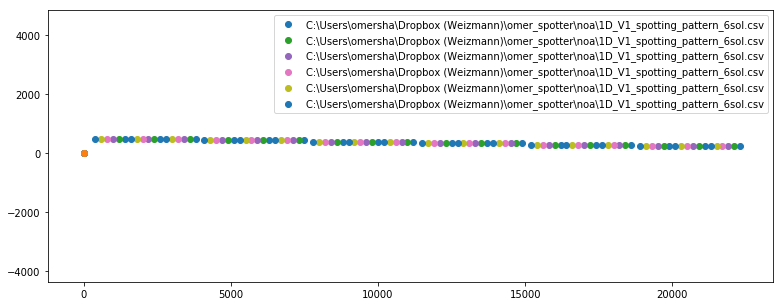

In [95]:
fileslist = []
fileslist.append('C:\\Users\\omersha\\Dropbox (Weizmann)\\omer_spotter\\noa\\1D_V1_spotting_pattern_6sol.csv')
f,ax = plt.subplots(1,1,figsize=(13,5))
for file in fileslist:
    for i in range(1,7):
        out_file_name = file[:-4]+'_%d.pattern'%i
        print ('writing to file: '+ out_file_name)
        writefile(file,out_file_name,layer=i,col=0)


writing to file: C:\Users\omersha\Dropbox (Weizmann)\omer_spotter\noa\1D_V1_spotting_pattern_6sol_-1.pattern
creating new file
done


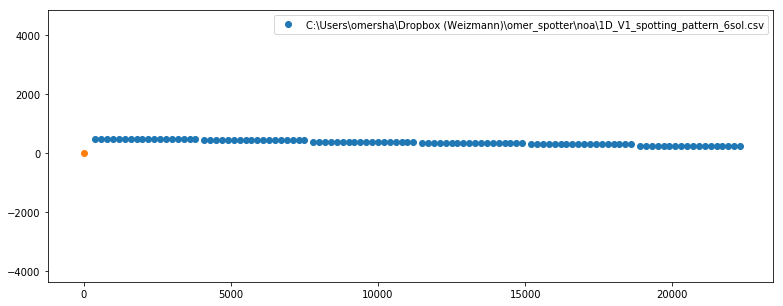

In [94]:
fileslist = []
fileslist.append('C:\\Users\\omersha\\Dropbox (Weizmann)\\omer_spotter\\noa\\1D_V1_spotting_pattern_6sol.csv')
f,ax = plt.subplots(1,1,figsize=(13,5))
for file in fileslist:
        out_file_name = file[:-4]+'_%d.pattern'%(-1)
        print ('writing to file: '+ out_file_name)
        writefile(file,out_file_name,layer=-1,col=0)
